# Homework 1

In [15]:
import seaborn as sns
data_A = sns.load_dataset('mpg')

In [8]:
data_A.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [13]:
data_A.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
64,15.0,8,318.0,150.0,4135,13.5,72,usa,plymouth fury iii
318,29.8,4,134.0,90.0,2711,15.5,80,japan,toyota corona liftback
214,13.0,8,302.0,130.0,3870,15.0,76,usa,ford f108
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
120,19.0,4,121.0,112.0,2868,15.5,73,europe,volvo 144ea
242,21.5,4,121.0,110.0,2600,12.8,77,europe,bmw 320i
133,16.0,6,250.0,100.0,3781,17.0,74,usa,chevrolet chevelle malibu classic
24,21.0,6,199.0,90.0,2648,15.0,70,usa,amc gremlin
293,31.9,4,89.0,71.0,1925,14.0,79,europe,vw rabbit custom
86,14.0,8,304.0,150.0,3672,11.5,73,usa,amc matador


mpg-discrete.

cylinders-discrete

displacement-discrete

horsepower-ratio

weight-ratio

acceleration-ratio

modelyear-discrete

origin-qualitative

In [16]:
data_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [18]:
data_A.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mpg,398,NaN,NaN,NaN,23.5146,7.81598,9,17.5,23,29,46.6
cylinders,398,NaN,NaN,NaN,5.45477,1.701,3,4,4,8,8
displacement,398,NaN,NaN,NaN,193.426,104.27,68,104.25,148.5,262,455
horsepower,392,NaN,NaN,NaN,104.469,38.4912,46,75,93.5,126,230
weight,398,NaN,NaN,NaN,2970.42,846.842,1613,2223.75,2803.5,3608,5140
acceleration,398,NaN,NaN,NaN,15.5681,2.75769,8,13.825,15.5,17.175,24.8
model_year,398,NaN,NaN,NaN,76.0101,3.69763,70,73,76,79,82
origin,398,3,usa,249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,398,305,ford pinto,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data_A.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [28]:
data_A.describe([0.5]).T

,count,mean,std,min,50%,max
mpg,398.0,23.514573,7.815984,9.0,23.0,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.0,8.0
displacement,398.0,193.425879,104.269838,68.0,148.5,455.0
horsepower,392.0,104.469388,38.491160,46.0,93.5,230.0
weight,398.0,2970.424623,846.841774,1613.0,2803.5,5140.0
acceleration,398.0,15.568090,2.757689,8.0,15.5,24.8
model_year,398.0,76.010050,3.697627,70.0,76.0,82.0


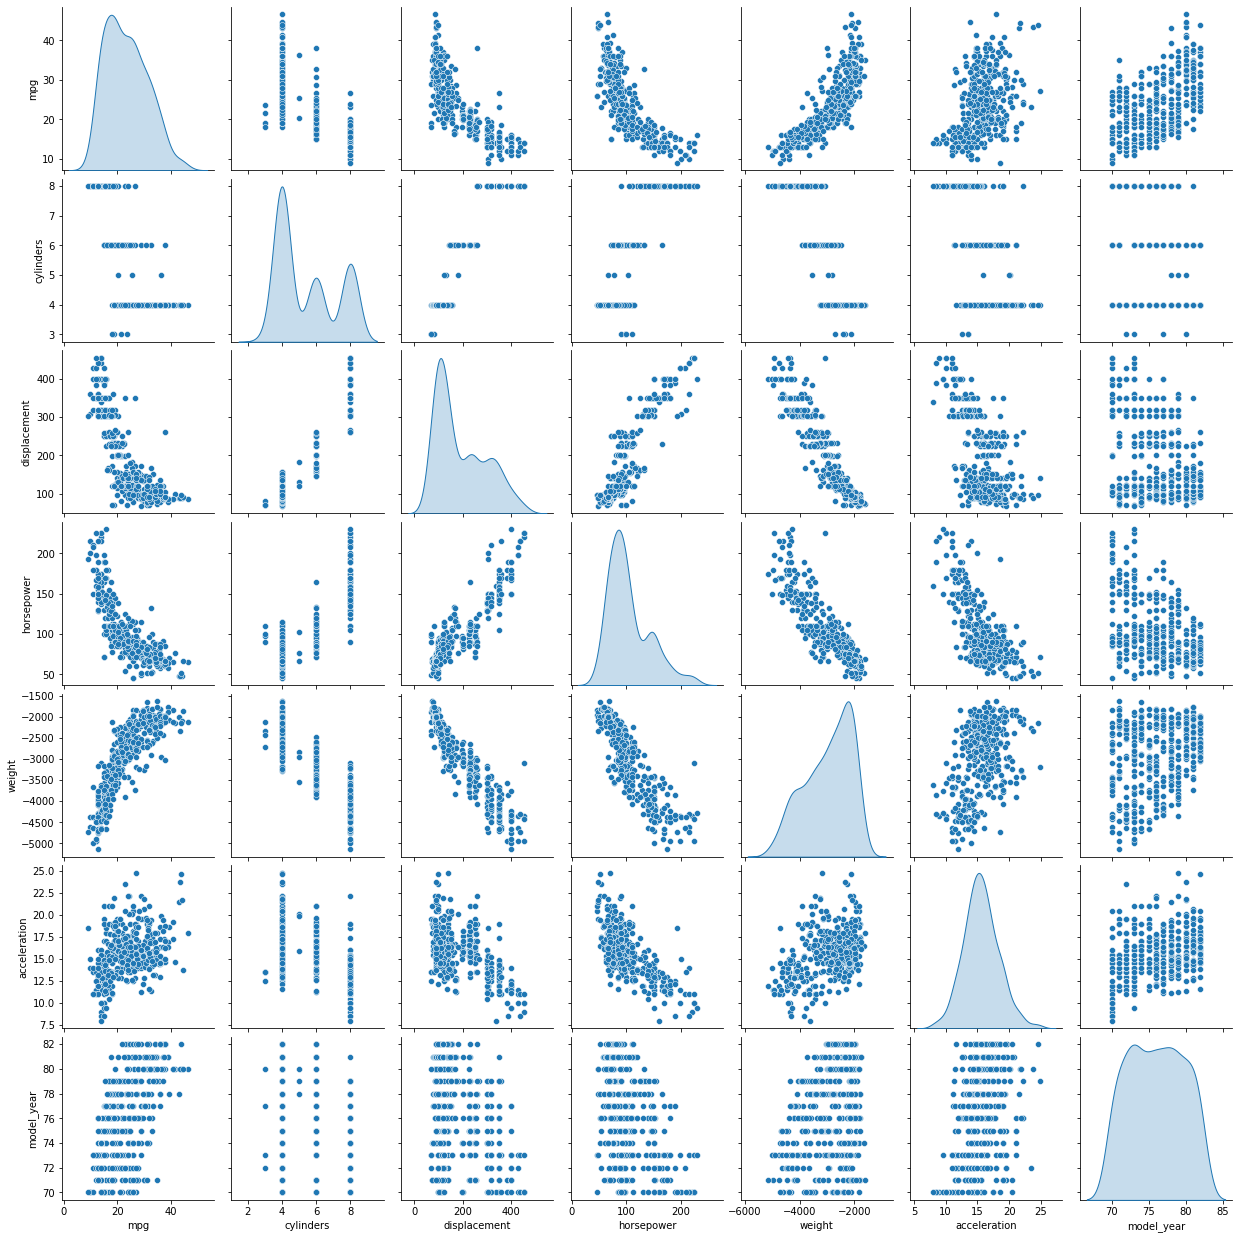

In [31]:
sns.pairplot(data_A,diag_kind="kde")

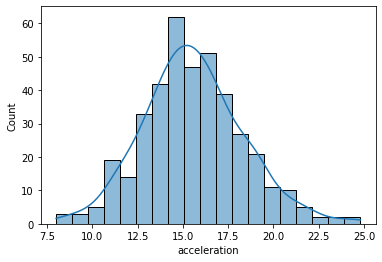

In [56]:
sns.histplot(data_A,x="acceleration",kde=True)

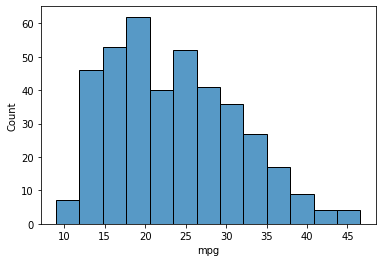

In [59]:
sns.histplot(data_A,x="mpg",kde=False)

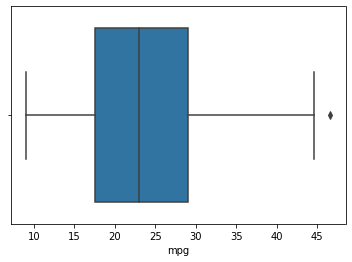

In [42]:
sns.boxplot(data=data_A, x="mpg");

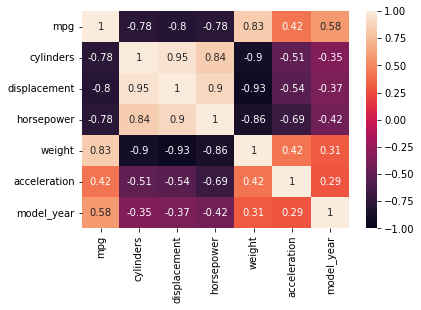

In [43]:
sns.heatmap(data_A.corr(), vmin=-1, vmax=1, annot=True)

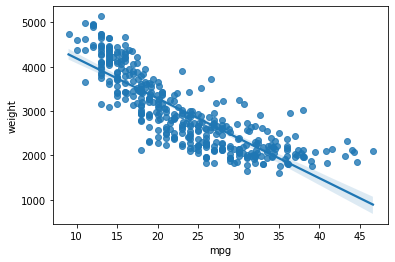

In [55]:
data_A.weight = -data_A.weight
sns.regplot(x="mpg", y="weight", ci=97, data=data_A)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_A['weight'], data_A['mpg'], test_size=0.33, random_state=42)
from scipy import stats
import matplotlib.pyplot as plt
slope, intercept, r_value, p_value, std_err = stats.linregress(X_train,Y_train)


In [65]:
x = X_test
y = intercept+slope*x
y

198    32.788358
396    26.301997
33     26.231663
208    16.025413
93     13.704389
         ...    
392    23.762157
379    30.209443
358    26.223848
310    31.436381
145    31.162860
Name: weight, Length: 132, dtype: float64

In [66]:
y[[0]]


0    19.432706
Name: weight, dtype: float64

In [68]:
Y_test[[0]]

0    18.0
Name: mpg, dtype: float64

# Homework 2

In [96]:
import pandas as pd
import numpy as np
np.random.seed(42)
veri1 = np.random.normal(10000, 1000, 500).astype(int)
veri2 = np.random.normal(9000, 900, 500).astype(int)
veri3 = np.random.normal(12000, 1200, 500).astype(int)
veri4 = np.random.normal(10000, 950, 500).astype(int)
df = pd.DataFrame(np.array([veri1,veri2,veri3,veri4]).T, columns=['A_before','B_before','A_after','B_after'])
olcum = df.copy()

In [95]:
olcum

,A_befor,B_befor,A_after,B_after
0,10496,9833,13679,10739
1,9861,10718,13109,9476
2,10647,7741,12071,9222
3,11523,9506,11223,9996
4,9765,8414,12837,9838
...,...,...,...,...
495,10538,8747,14407,11016
496,8962,10617,14473,9974
497,9809,9576,13450,9162
498,9124,8485,13228,9845


In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A_befor,500.0,10006.336,981.255496,6758.0,9299.25,10012.5,10636.00,13852.0
B_befor,500.0,9028.146,880.197872,6572.0,8463.50,9025.0,9585.75,11369.0
A_after,500.0,12129.684,1212.298473,8524.0,11276.75,12143.5,12905.50,15122.0
B_after,500.0,10031.004,934.875836,7206.0,9418.00,9991.0,10664.50,13033.0


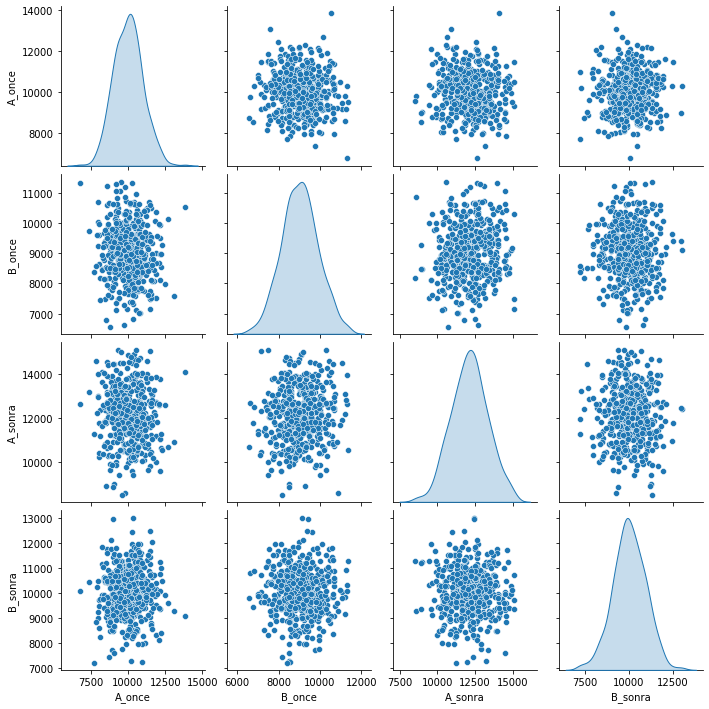

In [74]:
sns.pairplot(olcum, diag_kind="kde")

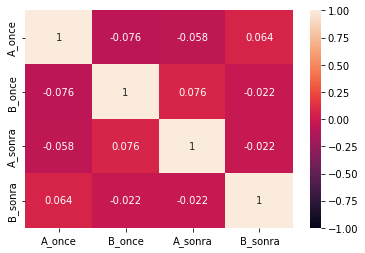

In [75]:
sns.heatmap(olcum.corr(), vmin=-1, vmax=1, annot=True)

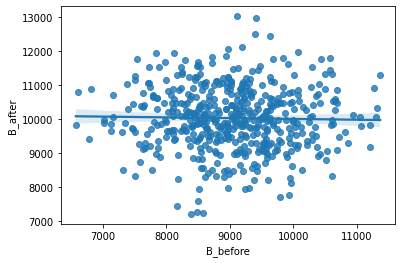

In [111]:
sns.regplot(x="B_before", y="B_after", ci=95, data=olcum)

In [97]:
from scipy.stats import shapiro
t_degeri,p_degeri = shapiro(olcum.A_before)
p_degeri

0.4010743498802185

In [77]:
t_degeri,p_degeri = shapiro(olcum.B_before)

p_degeri

0.6761667728424072

In [103]:
t_degeri,p_degeri = shapiro(olcum.A_before)
alpha=0.05
print(t_degeri,p_degeri)
if p_degeri>alpha:
     print("H0 hypothesis can't be rejected")
else:
    print("H1 hypothesis rejected")

0.9967007040977478 0.4010743498802185
H0 hypothesis can't be rejected


In [105]:
t_degeri,p_degeri= shapiro(olcum.A_after)
alpha = 0.05
print(t_degeri,p_degeri) 
if p_degeri>alpha:
     print("H0 hypothesis can't be rejected")
else:
    print("H1 hypothesis rejected")

0.9972554445266724 0.5761163234710693
H0 hypothesis can't be rejected


In [107]:
t_degeri,p_degeri= shapiro(olcum.B_before)
alpha = 0.05
print(t_degeri,p_degeri) 
if p_degeri>alpha:
     print("H0 hypothesis can't be rejected")
else:
    print("H1 hypothesis rejected")

0.9975419640541077 0.6761667728424072
H0 hypothesis can't be rejected


In [108]:
t_degeri,p_degeri= shapiro(olcum.B_after)
alpha = 0.05
print(t_degeri,p_degeri) 
if p_degeri>alpha:
     print("H0 hypothesis can't be rejected")
else:
    print("H1 hypothesis rejected")

0.9972566962242126 0.5765427947044373
H0 hypothesis can't be rejected


In [110]:
stats.ttest_1samp(olcum.A_before, popmean = 10000,nan_policy='propagate')

Ttest_1sampResult(statistic=0.1443836673305787, pvalue=0.8852558068210546)

In [113]:
t_degeri,p_degeri= stats.ttest_rel(olcum.A_before,olcum.A_after)
alpha = 0.05
print(t_degeri,p_degeri) 
if p_degeri>alpha:
     print("H0 hypothesis can't be rejected")
else:
    print("H1 hypothesis rejected")


-29.616560617895175 5.3664592819786775e-112
H1 hypothesis rejected


In [114]:
t_degeri,p_degeri= stats.ttest_rel(olcum.B_before,olcum.B_after)
alpha = 0.05
print(t_degeri,p_degeri) 
if p_degeri>alpha:
     print("H0 hypothesis can't be rejected")
else:
    print("H1 hypothesis rejected")

-17.279366523199087 8.88132208358409e-53
H1 hypothesis rejected
